<a href="https://colab.research.google.com/github/qiuyu-jia/20027797/blob/main/failStyleGAN2_Projection_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#Image Generation and Manipulation with StyleGAN2

##### This notebook was written in PyTorch and requires CUDA so cannot be run on a machine without an NVIDIA GPU. It allows you to generate images using a pre-trained GAN, in this case StyleGAN2 trained on the Flickr-Faces High Quality dataset (FFHQ). It allows you to upload an image of a portrait of a face from your device or from a URL and then align and project the image into the StyleGAN2 latent space. There are some latent vectors embeddings already precalculated and saved in the notebook code, that can be used for interpolation between latent points, these include: Donald Trump, Barack Obama, Albert Einstein and the Mona Lisa. 



##Install dependencies

In [68]:
! pip install Ninja

import sys

from google.colab import files
from io import BytesIO
import requests

from PIL import Image

from IPython.display import HTML
from base64 import b64encode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Clone github repository and download StyleGAN2 weights



In [69]:
def clone_deepdive_repo():
  !git clone https://github.com/terrybroad/deepdivelatentspace-tutorial-code
  sys.path.extend(['/content/deepdivelatentspace-tutorial-code/'])
  return 'gdrive/My Drive/deepdivelatentspace'
repo = clone_deepdive_repo()
%cd deepdivelatentspace-tutorial-code

Cloning into 'deepdivelatentspace-tutorial-code'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 134 (delta 2), reused 7 (delta 1), pack-reused 122
Receiving objects: 100% (134/134), 82.85 MiB | 35.16 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code


## Clone github repository and download StyleGAN2 weights



In [70]:
def clone_deepdive_repo():
  !git clone https://github.com/terrybroad/deepdivelatentspace-tutorial-code
  sys.path.extend(['/content/deepdivelatentspace-tutorial-code/'])
  return 'gdrive/My Drive/deepdivelatentspace'
repo = clone_deepdive_repo()
%cd deepdivelatentspace-tutorial-code

Cloning into 'deepdivelatentspace-tutorial-code'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 134 (delta 2), reused 7 (delta 1), pack-reused 122
Receiving objects: 100% (134/134), 82.85 MiB | 34.40 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Checking out files: 100% (39/39), done.
/content/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code


In [71]:
# Download model weights
! gdown --id 12FUktPicnxeVNh57TM-_FLzADwZlMF_T  -O ckpt/stylegan2-ffhq.pt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12FUktPicnxeVNh57TM-_FLzADwZlMF_T
To: /content/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/ckpt/stylegan2-ffhq.pt
100% 133M/133M [00:00<00:00, 236MB/s]


#Interpolation loop in *z* space

So the first thing we are going to generate is a short looping video in the *z* latent space of styleGAN2. This is the input space which is designed to be sampled directly. The latent vectors we sample in *z* get transformed the by the Style Transformer MLP and projected into *w* space before being fed at various points into the StyleGAN2 generator module. This code samples random points in the space and interpolates between them, as you will see all the generated outputs will be highly realistic.

In [72]:
# Run script to interpolate in z space and generate individual samples
! python3 interpolation_loop_z.py --ckpt ckpt/stylegan2-ffhq.pt
# Sequence samples into video
! ffmpeg -i interpolation_loop_z/%06d.png -minrate 1024k -maxrate 1024k -c:v libx264 -pix_fmt yuv420p -strict -2 videos/interpolation_loop_z.mp4
# Delete image samples
! rm -rf interpolation_loop_z

  0% 0/120 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "
100% 120/120 [01:16<00:00,  1.58it/s]
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --en

In [73]:
mp4 = open('videos/interpolation_loop_z.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls loop>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Prepare images for projection into latent space

We have shown what can be done, with some sampling of random latent variables in the *z* space, now we are going to allow you to upload an image of yourself, or anyone you choose, and project it into StyleGAN2 *w* space. You can either upload an image from your computer, or load it from the web using a url.

## Upload an image file from your computer

Recomended browser: Chrome\
Requirement: allow third-party cookies, add `https://[*.]googleusercontent.com:443` to cookie whitelist

Saving Mads_Mikkelsen_Cannes_2013_2.jpg to Mads_Mikkelsen_Cannes_2013_2.jpg


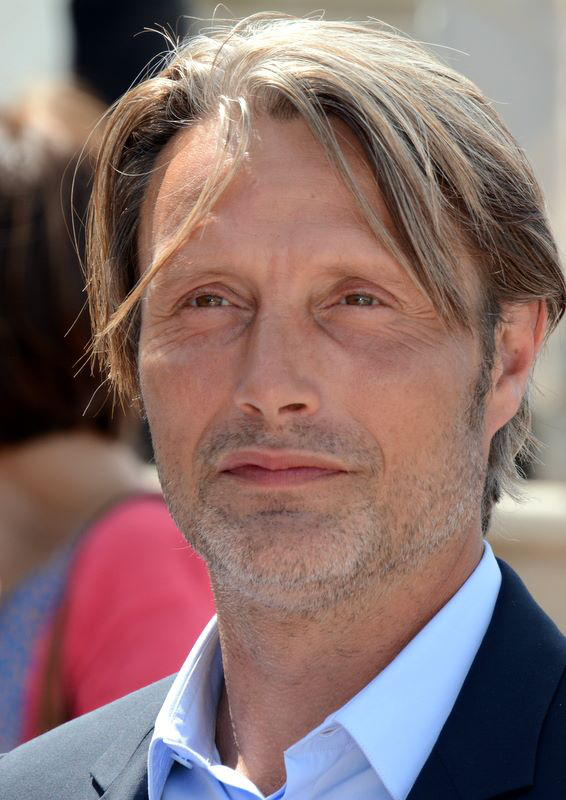

In [74]:
def img_from_local():
  uploaded = files.upload()
  filename = list(uploaded)[0]
  return BytesIO(uploaded[filename])

img_local = Image.open(img_from_local())
img_local.save('input_images/raw/uploaded.png','PNG')
img_local

## Pull image from URL

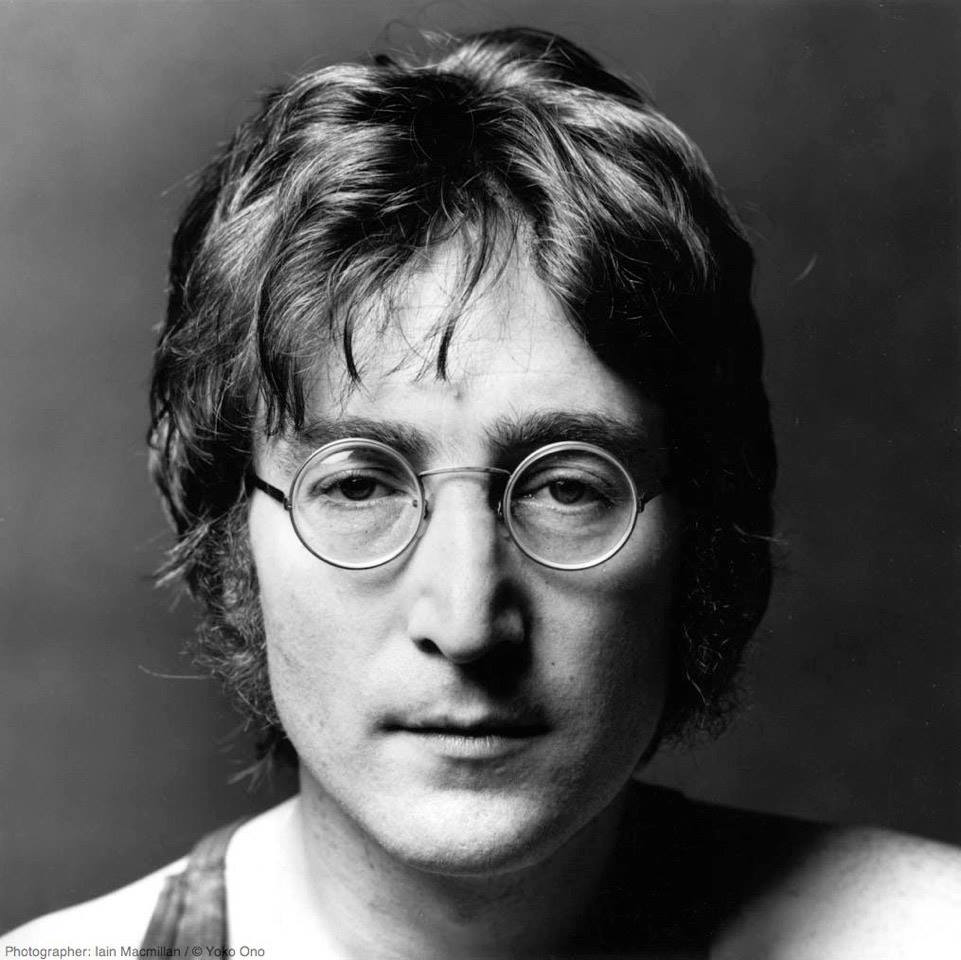

In [75]:
def img_from_url(url):
  response = requests.get(url)
  return BytesIO(response.content)
  
url = 'https://scontent-lhr8-1.xx.fbcdn.net/v/t31.18172-8/10827941_917096711642376_8190324923657871596_o.jpg?_nc_cat=110&ccb=1-7&_nc_sid=9267fe&_nc_ohc=5s1EE38dCJYAX-Xf9lg&_nc_ht=scontent-lhr8-1.xx&oh=00_AT-lk5NDHraKov9f5kY3MhnAcz2NUqL3TsNeV8Du6l6XmA&oe=62CDC463'
img_url = Image.open(img_from_url(url))
img_url.save('input_images/raw/uploaded.png','PNG')
img_url

# Align image using FFHQ pre-processing
This process used face landmark detection to detect faces in the image and crop and align to image to fit the alignment used in the FFHQ dataset that this styleGAN2 model was trained on.
Note: sometimes more than one face is extracted, check files or try uploaded_02, uploaded_03 etc. 
If no faces are extracted, try a different image. 

Aligning .gitignore ...
Getting landmarks...
Exception in landmark detection!
Aligning uploaded.png ...
Getting landmarks...
Starting face alignment...
Wrote result input_images/aligned/uploaded_01.png


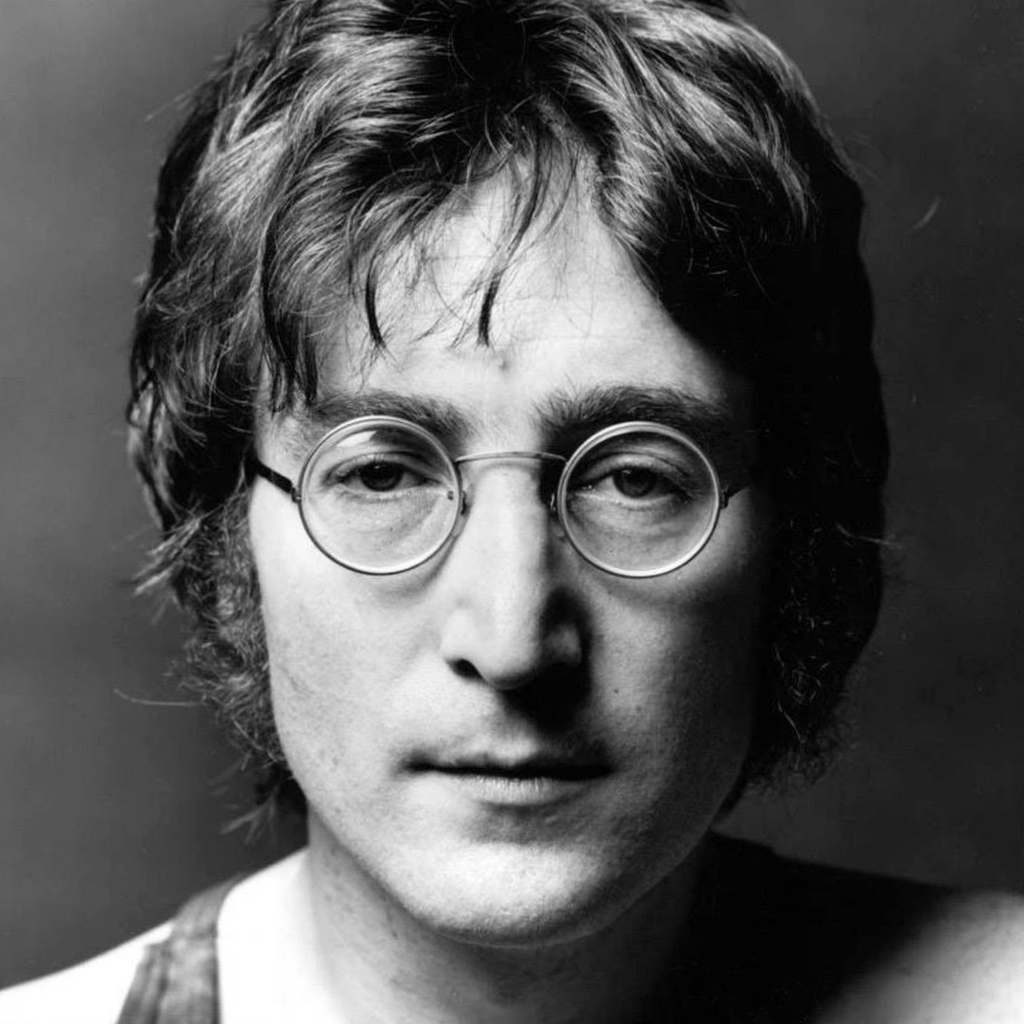

In [76]:
!python align_images.py
aligned_img = Image.open('input_images/aligned/uploaded_01.png')
aligned_img

# Project image into *w* space
We are now going to take our aligned image, and project it into the *w* space of StyleGAN2. This process will start with a random vector, and make changes to the latent vector and noise input, until it converges on on the closest matching image in StyleGAN2 space to our input image. This is quite a long process, however if you want to shorten it you can change the the flag `--step` to  a smaller number if you want to reduce the amount of steps taken to find the closest match.



In [81]:
# Change the input image to the relevant image you want to project
!python projector.py --ckpt ckpt/stylegan2-ffhq.pt input_images/aligned/uploaded_01.png --step 30
projected_img = Image.open('projections/Mads_Mikkelsen_Cannes_2013_2.jpg')
projected_img

Setting up Perceptual loss...
Loading model from: /content/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/deepdivelatentspace-tutorial-code/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
perceptual: 0.6260; noise regularize: 0.1284; mse: 0.4049; lr: 0.0000:   3% 1/30 [00:00<00:11,  2.60it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "
perceptual: 0.4106; noise regularize: 0.0020; mse: 0.2122; lr: 0.0043: 100% 30/30 [00:10<00:00,  2.77it/s]
Traceback (most recen

FileNotFoundError: ignored

Now we have our closest match in projected image space, depending on how closely the chosen image conforms to the content and style of photos in the Flickr Faces High Quality (FFHQ) dataset usually determines how closely we are going to be able to find a match. 

If we want to see the projection process in action, run the next cell to genereate an animation of the process.

In [ ]:
# Sequence samples into video
! ffmpeg -i projection_animation/%06d.png -minrate 1024k -maxrate 1024k -c:v libx264 -pix_fmt yuv420p -strict -2 videos/projection_animation.mp4
# Delete image samples
! rm -rf projection_animation

In [ ]:
mp4 = open('videos/projection_animation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#Interpolate between two projections

So what we are going to do next is interpolate from projected latent code to another. By default it will interpolate between your uploaded image and a projected latent code of Donald Trump, but there are also latent codes for Barack Obama, The Mona Lisa and Albert Einstein, so if you are so inclined you can switch `--latent2 projections/trump.pt` to `--latent2 projections/obama.pt`, `--latent2 projections/mona_lisa.pt` or `--latent2 projections/einstein.pt`. 

In [ ]:
# Run script to interpolate in z space and generate individual samples
! python3 interpolate_two_projections.py --latent1 projections/uploaded_01.pt --latent2 projections/trump.pt --ckpt ckpt/stylegan2-ffhq.pt
# Sequence samples into video
! ffmpeg -i interpolate_two_projections/%06d.png -minrate 1024k -maxrate 1024k -c:v libx264 -pix_fmt yuv420p -strict -2 videos/interpolate_two_projections.mp4
# Delete image samples
! rm -rf interpolate_two_projections

In [ ]:
mp4 = open('videos/interpolate_two_projections.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

And as you can see we get a very smooth video where all of the features slowly morph from one face into another.

#Style mixing between two projections

Another way of mixing two latent vectors in StyleGAN is to perform style mixing. Here we are not changing the vectors in anyway, we are just inserting into the model at different stages, so you can start off by generating features from one vector, and then switch to the other at some layer during the generation process. Here you can see generate two strips, starting from one latent vector and switching to the other at different points in the network. You can see this is quite a different way of mixing two samples together, whereas with the interpolation, all of the features transition smoothly, with style mixing we get high level features like the head shape of one mixed with lower level features like skin tone and complexion of the other latent vector. Again the default is trump but feel free to switch these to obama, mona lisa or einstein.

In [ ]:
! python style_mix_two_projections.py --latent1 projections/uploaded_01.pt --latent2 projections/trump.pt --label example1
style_mix_strip_1 = Image.open('sample/style_mix_example1.png')
style_mix_strip_1

In [ ]:
! python style_mix_two_projections.py --latent1 projections/trump.pt --latent2 projections/uploaded_01.pt --label example2
style_mix_strip_2 = Image.open('sample/style_mix_example2.png')
style_mix_strip_2

#Acknowledgements

We would like to thank the original StyleGAN & StyleGAN2 authors Tero Karras, Samuli Laine, Timo Aila, Miika Aittala, Janne Hellsten and Jaakko Lehtinen for their excellent work in advancing the state of the art of generative models.

We would like to thank Kim Seonghyeon for providing an open source [PyTorch implementation](https://github.com/rosinality/stylegan2-pytorch) used in this notebook.

We would like to thank Dmitry Nikitko for providing the [code we have used here for aligning images](https://github.com/Puzer/stylegan-encoder) before projection into StyleGAN and the figure that we have used to demonstrate the vector arithmetic.

This work was supported by the EPSRC [Centre for Doctoral Training in Intelligent Games & Games Intelligence](http://iggi.org.uk/) (IGGI) [EP/S022325/1].